In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\365\project\project.csv")

In [3]:
data.head(5)

,AxleNumber,TrainModel,VerticalVibration,CrackSizeVertical,RepairmentAxle,HorizontalVibration,CrackSizeHorizontal,RepairmentWheel
0,791,Subarna Express,1.60,0.01,False,0.001,0.00,DoNot
1,729,Mahanagar Provati,1.80,0.01,False,0.020,0.05,DoNot
2,742,Ekota Express,1.80,0.02,False,0.200,0.20,DoNot
3,739,Tista Express,1.90,0.10,False,0.370,0.25,DoNot
4,720,Parabat Express,1.95,0.14,False,0.500,0.27,DoNot


In [4]:
data.shape

(1000, 8)

In [5]:
data.isnull().sum()

AxleNumber              0
TrainModel              0
VerticalVibration      11
CrackSizeVertical      13
RepairmentAxle          1
HorizontalVibration     0
CrackSizeHorizontal     0
RepairmentWheel         0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

AxleNumber             0
TrainModel             0
VerticalVibration      0
CrackSizeVertical      0
RepairmentAxle         0
HorizontalVibration    0
CrackSizeHorizontal    0
RepairmentWheel        0
dtype: int64

In [8]:
data.head()

,AxleNumber,TrainModel,VerticalVibration,CrackSizeVertical,RepairmentAxle,HorizontalVibration,CrackSizeHorizontal,RepairmentWheel
0,791,Subarna Express,1.60,0.01,False,0.001,0.00,DoNot
1,729,Mahanagar Provati,1.80,0.01,False,0.020,0.05,DoNot
2,742,Ekota Express,1.80,0.02,False,0.200,0.20,DoNot
3,739,Tista Express,1.90,0.10,False,0.370,0.25,DoNot
4,720,Parabat Express,1.95,0.14,False,0.500,0.27,DoNot


In [9]:
le_RepairmentAxle = LabelEncoder()
le_AxleNumber = LabelEncoder()
le_TrainModel = LabelEncoder()

In [10]:
data['RepairmentAxle_x'] =le_RepairmentAxle.fit_transform(data['RepairmentAxle'])
data['AxleNumber_x'] =le_AxleNumber.fit_transform(data['AxleNumber'])
data['TrainModel_x'] =le_TrainModel.fit_transform(data['TrainModel'])
data.head()

,AxleNumber,TrainModel,VerticalVibration,CrackSizeVertical,RepairmentAxle,HorizontalVibration,CrackSizeHorizontal,RepairmentWheel,RepairmentAxle_x,AxleNumber_x,TrainModel_x
0,791,Subarna Express,1.60,0.01,False,0.001,0.00,DoNot,0,91,29
1,729,Mahanagar Provati,1.80,0.01,False,0.020,0.05,DoNot,0,29,17
2,742,Ekota Express,1.80,0.02,False,0.200,0.20,DoNot,0,42,9
3,739,Tista Express,1.90,0.10,False,0.370,0.25,DoNot,0,39,31
4,720,Parabat Express,1.95,0.14,False,0.500,0.27,DoNot,0,20,24


In [11]:
inputs = data.drop('AxleNumber',axis='columns')
inputs = inputs.drop('TrainModel',axis='columns')
inputs = inputs.drop('RepairmentAxle',axis='columns')
inputs.head()

,VerticalVibration,CrackSizeVertical,HorizontalVibration,CrackSizeHorizontal,RepairmentWheel,RepairmentAxle_x,AxleNumber_x,TrainModel_x
0,1.60,0.01,0.001,0.00,DoNot,0,91,29
1,1.80,0.01,0.020,0.05,DoNot,0,29,17
2,1.80,0.02,0.200,0.20,DoNot,0,42,9
3,1.90,0.10,0.370,0.25,DoNot,0,39,31
4,1.95,0.14,0.500,0.27,DoNot,0,20,24


In [12]:
attributes = inputs.columns
attributes

Index(['VerticalVibration', 'CrackSizeVertical', 'HorizontalVibration',
       'CrackSizeHorizontal', 'RepairmentWheel', 'RepairmentAxle_x',
       'AxleNumber_x', 'TrainModel_x'],
      dtype='object')

In [13]:
attributes = [x for x in attributes if x != 'RepairmentWheel']
attributes

['VerticalVibration',
 'CrackSizeVertical',
 'HorizontalVibration',
 'CrackSizeHorizontal',
 'RepairmentAxle_x',
 'AxleNumber_x',
 'TrainModel_x']

In [14]:
train, test = train_test_split(inputs, test_size = 0.25)
print(len(inputs))
print(len(train))
print(len(test))

975
731
244


In [15]:
dt= DecisionTreeClassifier(min_samples_split = 100, criterion='entropy')
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter = 900, activation = 'relu')

In [16]:
x_train = train[attributes]
y_train = train["RepairmentWheel"]

x_test = test[attributes]
y_test = test["RepairmentWheel"]

In [17]:
Nb=GaussianNB()
Nb= Nb.fit(x_train,y_train)

In [18]:
dt = dt.fit(x_train, y_train)
mlp = mlp.fit(x_train, y_train)

In [19]:
y_fore1 = dt.predict(x_test)
y_fore2 = Nb.predict(x_test)
y_fore3 = mlp.predict(x_test)

In [20]:
y_fore1
y_fore2
y_fore3

array(['Do', 'DoNot', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'DoNot', 'Do',
       'DoNot', 'DoNot', 'Do', 'DoNot', 'Do', 'Do', 'Do', 'DoNot', 'Do',
       'Do', 'Do', 'DoNot', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'DoNot',
       'Do', 'Do', 'DoNot', 'Do', 'DoNot', 'Do', 'Do', 'Do', 'Do', 'Do',
       'DoNot', 'Do', 'DoNot', 'DoNot', 'Do', 'Do', 'Do', 'Do', 'Do',
       'Do', 'Do', 'DoNot', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do',
       'Do', 'Do', 'Do', 'Do', 'DoNot', 'Do', 'DoNot', 'Do', 'DoNot',
       'DoNot', 'Do', 'Do', 'DoNot', 'DoNot', 'Do', 'DoNot', 'Do', 'Do',
       'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do',
       'DoNot', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'DoNot',
       'Do', 'Do', 'Do', 'Do', 'Do', 'DoNot', 'Do', 'Do', 'Do', 'Do',
       'Do', 'DoNot', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'DoNot',
       'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do', 'Do',
       'Do', 'DoNot', 'Do', 'Do', 'Do', 'DoNot', 'Do', 'Do', 'D

In [21]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, y_fore1) * 100
print("Desicion Tree accuracy(%): ", round(score1, 1), "%" )
score2 = accuracy_score(y_test, y_fore2) * 100
print("  Naive Bayes accuracy(%): ", round(score2, 1), "%" )
score3 = accuracy_score(y_test, y_fore3) * 100
print("    Neural Net accuracy(%): ", round(score3, 1), "%" )

Desicion Tree accuracy(%):  100.0 %
  Naive Bayes accuracy(%):  96.3 %
    Neural Net accuracy(%):  97.1 %


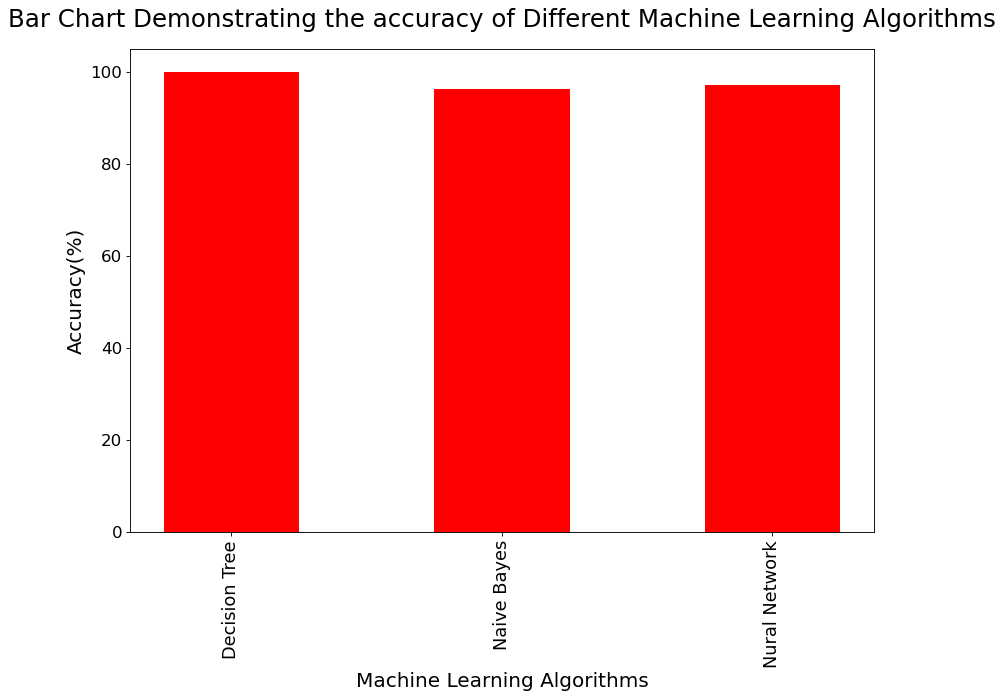

In [24]:
plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')

bar_width = 0.5
objects = ["Decision Tree", "Naive Bayes","Nural Network"]
y_axis = [score1, score2, score3]
y_pos = np.arange(len(objects))

plt.bar(y_pos, y_axis, bar_width, align='center', color='r')
plt.xticks(y_pos, objects, rotation='vertical', fontsize=16)
plt.yticks(fontsize=15)
plt.xlabel('Machine Learning Algorithms', fontsize=18)
plt.ylabel('Accuracy(%)', fontsize=18)
plt.title('Bar Chart Demonstrating the accuracy of Different Machine Learning Algorithms', fontsize=22, pad=20)
plt.show()